<a href="https://colab.research.google.com/github/iAmGb-20/SureStartAI-2021/blob/main/Autoencoders_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)


In [2]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [3]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

Now let's train our autoencoder to reconstruct MNIST digits.

First, we'll configure our model to use a per-pixel binary crossentropy loss, and the Adam optimizer:

In [4]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [5]:
#Let's prepare our input data. We're using MNIST digits, and we're discarding the labels (since we're only interested in encoding/decoding the input images).

In [6]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Data normalization

In [7]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [8]:
#let's train autoencoder for 50 epochs
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 3s 4ms/step - loss: 0.3794 - val_loss: 0.1903
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1807 - val_loss: 0.1558
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1516 - val_loss: 0.1361
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1340 - val_loss: 0.1234
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1223 - val_loss: 0.1143
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1139 - val_loss: 0.1081
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1081 - val_loss: 0.1035
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1037 - val_loss: 0.1002
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1008 - val_loss: 0.0976
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0984 - val_loss: 0.0960

After 50 epochs, the autoencoder seems to reach a stable train/validation loss value of about 0.09. We can try to visualize the reconstructed inputs and the encoded representations. We will use Matplotlib.

In [9]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

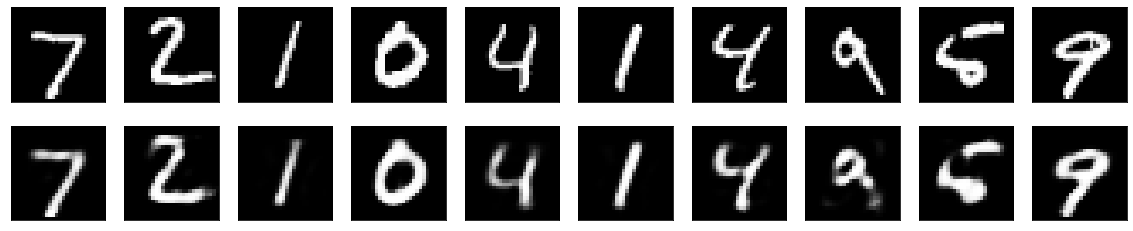

In [10]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**Adding a sparsity constraint on the encoded representations**

to constrain the representations to be compact is to add a sparsity contraint on the activity of the hidden representations, so fewer units would "fire" at a given time. In Keras, this can be done by adding an activity_regularizer to our Dense layer:

In [11]:
from keras import regularizers

encoding_dim = 32

input_img = keras.Input(shape=(784,))
# Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [12]:
#Deep autoencoder
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [13]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3302 - val_loss: 0.1588
Epoch 2/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1512 - val_loss: 0.1323
Epoch 3/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1300 - val_loss: 0.1214
Epoch 4/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1200 - val_loss: 0.1141
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1141 - val_loss: 0.1097
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1107 - val_loss: 0.1068
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1075 - val_loss: 0.1043
Epoch 8/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1047 - val_loss: 0.1020
Epoch 9/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1024 - val_loss: 0.0996
Epoch 10/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1003 - val_lo

**Convolutional autoencoder**

Since our inputs are images, it makes sense to use convolutional neural networks (convnets) as encoders and decoders. In practical settings, autoencoders applied to images are always convolutional autoencoders --they simply perform much better.

Let's implement one. The encoder will consist in a stack of Conv2D and MaxPooling2D layers (max pooling being used for spatial down-sampling), while the decoder will consist in a stack of Conv2D and UpSampling2D layers.

In [14]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [15]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [17]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/50
469/469 [==============================] - 9s 6ms/step - loss: 0.2883 - val_loss: 0.1451
Epoch 2/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1402 - val_loss: 0.1265
Epoch 3/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1250 - val_loss: 0.1184
Epoch 4/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1179 - val_loss: 0.1131
Epoch 5/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1135 - val_loss: 0.1095
Epoch 6/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1100 - val_loss: 0.1067
Epoch 7/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1074 - val_loss: 0.1050
Epoch 8/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1055 - val_loss: 0.1032
Epoch 9/50
469/469 [==============================] - 3s 5ms/step - loss: 0.1041 - val_loss: 0.1019
Epoch 10/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1026 - val_loss: 0.1007

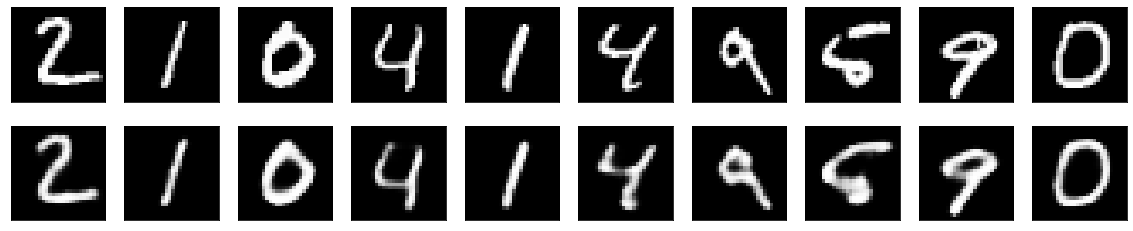

In [18]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


We can also have a look at the 128-dimensional encoded representations. These representations are 8x4x4, so we reshape them to 4x32 in order to be able to display them as grayscale images.

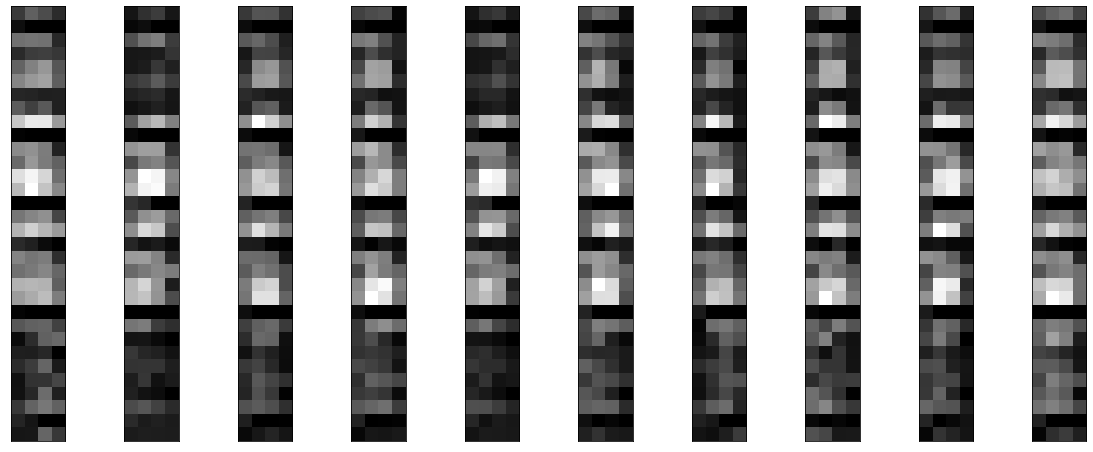

In [19]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**Application to image denoising**

Let's put our convolutional autoencoder to work on an image denoising problem. It's simple: we will train the autoencoder to map noisy digits images to clean digits images.

Here's how we will generate synthetic noisy digits: we just apply a gaussian noise matrix and clip the images between 0 and 1.

In [20]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

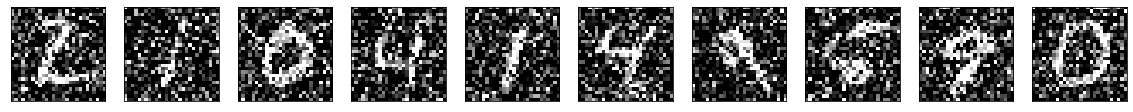

In [21]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


Compared to the previous convolutional autoencoder, in order to improve the quality of the reconstructed, we'll use a slightly different model with more filters per layer:

In [22]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [23]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/100
469/469 [==============================] - 4s 7ms/step - loss: 0.2646 - val_loss: 0.1170
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1159 - val_loss: 0.1123
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1098 - val_loss: 0.1058
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1061 - val_loss: 0.1033
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1041 - val_loss: 0.1018
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1023 - val_loss: 0.1004
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1011 - val_loss: 0.0997
Epoch 8/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1002 - val_loss: 0.0989
Epoch 9/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0996 - val_loss: 0.0987
Epoch 10/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0989 - val_lo

**Variational autoencoder (VAE)**
First, here's our encoder network, mapping inputs to our latent distribution parameters:


In [38]:
original_dim = 28 * 28
intermediate_dim = 64
latent_dim = 2

inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)

In [39]:
from keras import backend as K

def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])

In [40]:
# Create encoder
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')


In [41]:
#We train the model using the end-to-end model, with a custom loss function: the sum of a reconstruction term, and the KL divergence regularization term.
reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

We train our VAE on MNIST digits:

In [47]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

vae.fit(x_train, x_train,
        epochs=100,
        batch_size=32,
        validation_data=(x_test, x_test))

Epoch 1/100
1875/1875 [==============================] - 5s 3ms/step - loss: 167.7037 - val_loss: 165.5465
Epoch 2/100
1875/1875 [==============================] - 5s 3ms/step - loss: 164.4666 - val_loss: 162.6147
Epoch 3/100
1875/1875 [==============================] - 5s 3ms/step - loss: 161.5480 - val_loss: 160.6007
Epoch 4/100
1875/1875 [==============================] - 5s 3ms/step - loss: 159.4869 - val_loss: 158.7128
Epoch 5/100
1875/1875 [==============================] - 5s 3ms/step - loss: 157.7823 - val_loss: 157.1998
Epoch 6/100
1875/1875 [==============================] - 5s 3ms/step - loss: 156.3064 - val_loss: 155.8444
Epoch 7/100
1875/1875 [==============================] - 5s 3ms/step - loss: 155.1809 - val_loss: 154.9628
Epoch 8/100
1875/1875 [==============================] - 5s 3ms/step - loss: 154.3538 - val_loss: 154.3436
Epoch 9/100
1875/1875 [==============================] - 5s 3ms/step - loss: 153.6422 - val_loss: 153.7449
Epoch 10/100
1875/1875 [=============

NameError: ignored

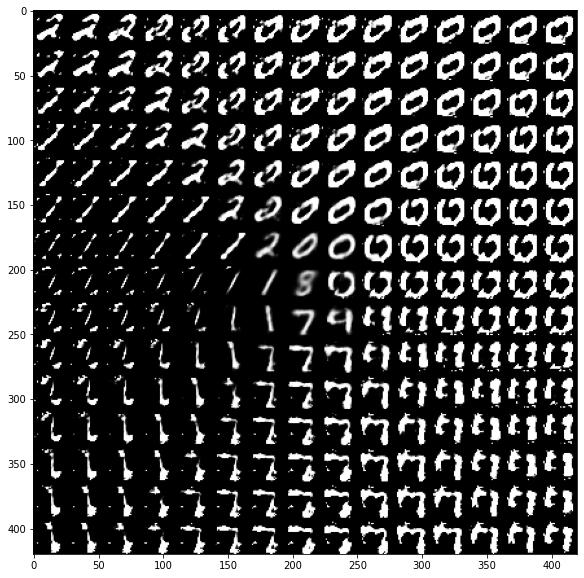

In [53]:
x_test_encoded = encoder.predict(x_test, batch_size=32)
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()

Should come back to this again! : https://blog.keras.io/building-autoencoders-in-keras.html